<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/APUNTES_Curso_Profesional_de_ML_con_Scikit-Learn/blob/main/NotasClases.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Apuntes del Curso Profesional de Machine Learning con Scikit-Learn de Platzi

En este curso se explica cómo se aplican con modelos de Machine Learning a lo largo del flujo de trabajo de Machine Learning: Representación - Evaluación - Optimización

Usa distintos conjuntos de datos sencillos para explorar los datos, aplicar modelos simples para luego empezar a aplicar técnicas avanzadas es selección de features, regularización, métodos de ensamble, validación, optimización y mas.

## Configuraciones previas

In [4]:
#Conocer la versión de python
!python --version

Python 3.10.4


In [8]:
conda install -c anaconda scikit-learn

Note: you may need to restart the kernel to use updated packages.



Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Marco\.conda\envs\mlenv

  added / updated specs:
    - scikit-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.01.10 |       haa95532_0         158 KB  anaconda
    certifi-2022.12.7          |  py310haa95532_0         153 KB  anaconda
    joblib-1.1.1               |  py310haa95532_0         414 KB  anaconda
    openssl-1.1.1s             |       h2bbff1b_0         5.8 MB  anaconda
    scikit-learn-1.2.0         |  py310hd77b12b_1         7.7 MB  anaconda
    threadpoolctl-2.2.0        |     pyh0d69192_0          16 KB  anaconda
    ------------------------------------------------------------
                                           Total:        14.2 MB

The following NEW packages will be INSTALLED:

  joblib             anaconda/win-64::joblib-1.1.1-py310haa955


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [92]:
# Importamos las bibliotecas generales
 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 

Vamos a usar tres conjuntos de datos:
* heart.csv
* felicidad.csv
* candy.csv

## Introducción a PCA

PCA = Principal Component Analysis

Es una de las técnicas que podemos usar para reducir la dimensionalidad de nuestros features y elegir features que nos proporcionen la información mas importante.

El principio de PCA es combinar distintos features de nuestro conjunto de datos en otros features artificiales pero que mantengan la misma información, por ejemplo, manteniendo la varianza entre los features.

In [ ]:
# Importamos los módulos específicos
 
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
 
from sklearn.linear_model import LogisticRegression
 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Lo que buscamos es una clasificación de pacientes binaria entre si un paciente tiene o no una enfermedad cardíaca tenindo en cuenta las caracteristicas del paciente, es decir, maximizando la información de los features.

In [12]:
# Cargamos los datos del dataframe de pandas
dt_heart = pd.read_csv('datasets\heart.csv')

# Imprimimos un encabezado con los primeros 5 registros
dt_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [20]:
# Guardamos nuestro dataset sin la columna de target
dt_features = dt_heart.drop(['target'], axis=1)
dt_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [14]:
# Nuestro target será solo la columna de target
dt_target = dt_heart['target']
dt_target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [16]:
# Normalizamos los datos
## fit_transform lo que hace es cargar los datos, ajustar el modelo y
## aplicar la transformación de una vez sobre el mismo conjunto de datos
## Esto sobreescribe la variable dt_featur con los valores ya transformados
## a los target no necesitamos hacerle esto
dt_features = StandardScaler().fit_transform(dt_features)

In [18]:
# Partimos el conjunto de entrenamiento. Para añadir replicabilidad usamos el random state
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [22]:
# Consultamos la forma de los x e y
print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


In [23]:
# Llamamos y configuramos nuestro algoritmo pca
## EL número de componentes es opcional, ya que por defecto si no le pasamos el 
## número de componentes lo asignará de esta forma:
## a: n_components = min(n_muestras, n_features)
pca = PCA(n_components=3)

In [24]:
# Ajustamos nuestro modelo con los datos de entrenamiento
pca.fit(X_train)

PCA(n_components=3)

In [25]:
#Como haremos una comparación con incremental PCA, hacemos los mismos pasos
## EL parámetro batch se usa para crear pequeños bloques, de esta forma podemos ir entrenandolos
## poco a poco y combinarlos en el resultado final'''
ipca = IncrementalPCA(n_components=3, batch_size=10)
# Ajustamos
ipca.fit(X_train)

IncrementalPCA(batch_size=10, n_components=3)

Una vez ajustados los datos vamos a poder medir la varianza de los componentes que obtengo al ejecutarse y lo vamos a ver con una representación gráfica.

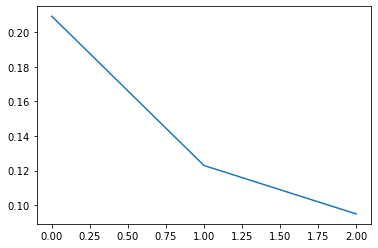

In [26]:
# range(len(pca.explained_variance_) es el eje x: grafica en el rango desde 0 hasta el número de componentes
## es decir, la longitud de los componentes que me sugirió pca
# pca.explained_variance_ratio_ es el eje y: se ven los valores de importancia para nuestro modelo
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

Nos muestra 3 componenetes (0, 1 y 2) y nos dice que el componente 0 se lleva la mayor importancia, mas del 20% de la información, mientras que la segunda apenas supera el 12% y la tercera casi no tiene importancia.
Podemos intuir que las dos primeras componentes son las que nos están aportando la mayor cantidad de información relevante.

In [27]:
#Ahora vamos a configurar nuestra regresión logística
logistic = LogisticRegression(solver='lbfgs')

In [28]:
# Configuramos los datos de entrenamiento para pca
# tanto en el conjunto de entrenamiento como de testeo
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)

In [29]:
# pasamos nuestro conjunto de entrenamiento por el modelo de clasificación
logistic.fit(dt_train, y_train)

LogisticRegression()

In [30]:
#Calculamos nuestra exactitud de nuestra predicción
print("SCORE PCA: ", logistic.score(dt_test, y_test))

SCORE PCA:  0.7857142857142857


In [31]:
# Hacemos lo mismo para ipca
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print("SCORE IPCA: ", logistic.score(dt_test, y_test))

SCORE IPCA:  0.8051948051948052


Lo que hicimos fue, reducir los features del data set de 13 que tenía originalmente a 3 features artificiales mediante PCA y luego hicimos una clasificación binaria entre pacientes con o sin enfermedad cardíaca.

## Variaciones de PCA

* IPCA: es PCA incremental y lo usamos cuando necesitamos poder computacional (lo vimos antes)
* KPCA: cuando los datos no tienen una estructura separable linealmente y encontramos un Kernel que puede mapearlos

### Kernel PCA

Un KERNEL es una función matemática que toma mediciones que se comportan de manera no lineal y las proyecta en un espacio dimensional mas grande donde son linealmente separables.

In [32]:
from sklearn.decomposition import KernelPCA

In [33]:
# Hacemos todo lo mismo que antes
dt_heart = pd.read_csv('datasets\heart.csv')
dt_features = dt_heart.drop(['target'], axis=1)
dt_target = dt_heart['target']
dt_features = StandardScaler().fit_transform(dt_features)
X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)

In [34]:
# definimos una variable para el modelo
kpca = KernelPCA(n_components=4, kernel='poly')

In [35]:
# Ajustamos los datos
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

In [36]:
# Aplicamos nuestro modelo a los datos de entrenamiento y prueba
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

In [38]:
# Una vez reducida la dimensionalidad aplicamos el clasificador
logistic = LogisticRegression(solver='lbfgs')

In [39]:
# Entrenamos
logistic.fit(dt_train, y_train)
print("SCORE KPCA: ", logistic.score(dt_test, y_test))

SCORE KPCA:  0.7987012987012987


## Regularización

Consiste en reducir la complejidad del modelo a través de una penalización aplicada a sus variables o features mas irrelevantes.

Tipos de recularización:
* **L1 o Lasso**: reduce la complejidad a través de la **eliminación** de features que no aportan demasiado al modelo
* **L2 o Ridge**: reduce la complejidad **disminuyendo** el impacto de los features que no aportan demasiado.
* **ElasticNet**: combina las dos regulaciones anteriores

In [40]:
# importamos las funciones que necesitamos
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [42]:
# Cargamos los datos del dataframe de pandas
dataset = pd.read_csv('./datasets/felicidad.csv')

In [43]:
dataset.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [44]:
dataset.describe()

,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


In [45]:
# Vamos a elegir los features que queremos usar para nuestro X y las etiquetas para nuestro Y
X = dataset[['gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia']]
y = dataset[['score']]

In [46]:
# Consultamos la forma de los x e y
print(X.shape)
print(y.shape)

(155, 7)
(155, 1)


In [66]:
# partimos el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [67]:
# Ajustamos nuestro modelo
model_lineal = LinearRegression().fit(X_train, y_train)

In [68]:
#Calculamos la prediccion que nos da con el conjunto de prueba
y_predict_linear = model_lineal.predict(X_test)

In [73]:
# Creamos el modelo con recularización y entrenamos
# A mas grande alpha mas penalización
modelLasso = Lasso(alpha=0.02).fit(X_train, y_train)
y_predict_lasso = modelLasso.predict(X_test)

In [74]:
# Lo mismo para Ridge
modelRidge = Ridge(alpha=1).fit(X_train, y_train)
y_predict_ridge = modelRidge.predict(X_test)

In [75]:
# La métrica que elegimos es el error cuadrático
# definimos las pérdidas para cada modelo
linear_loss = mean_squared_error(y_test, y_predict_linear)
print('Linear Loss: ', linear_loss)
linear_laso = mean_squared_error(y_test, y_predict_lasso)
print('Linear Laso: ', linear_laso)
linear_ridge = mean_squared_error(y_test, y_predict_ridge)
print('Linear Ridge: ', linear_ridge)

Linear Loss:  8.28147579490474e-08
Linear Laso:  0.0559459407171727
Linear Ridge:  0.008581305990298313


In [76]:
# Veamos como afectan los coeficientes de cada modelo, es decir, los que multiplican a los feature
# para penalizar. En Lasso algunos tienen que ser cero y en Ridge cercano a cero pero no cero
print('Coef LASSO')
print(modelLasso.coef_)
print('='*80)
print('Coef RIDGE')
print(modelRidge.coef_)

Coef LASSO
[1.23881311 0.83275522 0.56373067 0.78502767 0.         0.19535702
 0.88685095]
Coef RIDGE
[[1.06876226 0.93685633 0.8636589  0.8909844  0.5875662  0.74116243
  0.95402339]]


Mirando los coeficientes podemos ver qué feature tiene mas peso

In [78]:
# Probamos ElasticNet
from sklearn.linear_model import ElasticNet
modelElastic = ElasticNet(random_state=0).fit(X_train, y_train)
y_predict_Elastic = modelElastic.predict(X_test)
linear_elastic = mean_squared_error(y_test, y_predict_Elastic)
print('Linear Elastic: ', linear_elastic)
print('Coef ELASTIC')
print(modelElastic.coef_)

Linear Elastic:  1.5372256779647213
Coef ELASTIC
[0. 0. 0. 0. 0. 0. 0.]


## Regresión Robusta

Cuando tenemos **valores atípicos**, un procedimiento es eliminarlos o sino transformarlos, pero a veces no tenemos mas opción que lidiar con ellos al momento de aplicar los modelos.

Scikit-learn nos ofrece metaestimadores que nos permiten configurar distintos estimadores para lidiar con los valores atípicos de una manera fácil de usar. Estas técnicas se las conoce como **Regresión robusta**.

Métodos:

* **RANSAC**: Random Sample Consensus, que hace un muestreo aleatorio sobre los datos y busca muestras que mas datos "buenos" logra incluir. El modelo asume que los valores "malos" no tienen patrones específicos.

* **Huber Reggresor**: No intenta sacar los valores atípicos y dejarlos fuera, sino penalizalos para disminuir su influencia en el modelo. Los datos son tratados cómo atípicos si el error absoluto de nuestra pérdida está por encima de un valor umbral llamado epsilon (en general epsilon es 1,35).

In [79]:
from sklearn.linear_model import (RANSACRegressor, HuberRegressor)
from sklearn.svm import SVR #Es el regresor que vamos a usar
from sklearn.metrics import mean_squared_error

In [81]:
dataset = pd.read_csv('./RegresionRobusta/data/felicidad_corrupt.csv')
dataset.tail()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
162,H,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,I,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,J,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,K,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,L,167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
# Elegimos los feature con los que vamos a trabajar haciendo drop a las que no queremos
X = dataset.drop(['country', 'score'], axis=1)
y = dataset['score']
# Hacemos la partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [84]:
# Guardamos todos los estimadores dentro de un diccionario
## RANSAC no es un estimador es un metaestimado, donde podemos usar varios estimadores en el
## pero en este caso lo vamos a dejar sin parámetros lo que por defecto es una regresión lineal
estimadores = { 'SVR'    : SVR(gamma='auto', C=1.0, epsilon=0.1),
                'RANSAC' : RANSACRegressor(),
                'HUBBER' : HuberRegressor(epsilon=1.35)}

In [85]:
for name, estimador in estimadores.items():
    estimador.fit(X_train, y_train)
    predictions = estimador.predict(X_test)
    print('='*80)
    print(name)
    print('MSE: ', mean_squared_error(y_test, predictions))

SVR
MSE:  0.07455771301888525
RANSAC
MSE:  1.2756405701033106e-19
HUBBER
MSE:  2.317373092927481e-06


C:\Users\Marco\.conda\envs\mlenv\lib\site-packages\sklearn\linear_model\_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


RANSAC y HUBBER tienen errore muchos mas bajos que SVR, lo que nos muestra que los valores atípicos sí tienen un efecto en nuestro resultado final.

## Métodos de ensamble

Funcionan muy bien cuando queremos usar varios estimadores y llegar a una única conclusión. Es decir, se prueban distintos algorítmos con distintas configuraciones y se aplica un método para lograr un consenso entre los resultados.

Dos estrategias:

* **Bagging**: viene de Bootstrap Aggregation y consiste en tener en paralelo varios modelos, cada uno con un resultado y que por algún método de consenso tome un resultado final. Ejemplos de métodos de consenso son: votación, random Forest, o cualquier familia de modelos de ML.
* **Boosting**: busca fortalecer gradualmente un modelo de aprendizaje usando siempre el error residual de las etapas anteriores. Son ejemplo de esto: AdaBoost, Gradient Tree Boosting y XSBoost.

### Bagging

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn. ensemble import BaggingClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
dt_heart = pd.read_csv('./datasets/heart.csv')

In [5]:
# Las estadísticas nos muestran que la columna se compone de 0 y 1 solamente.
dt_heart['target'].describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [7]:
# Elegimos los feature con los que vamos a trabajar haciendo drop a las que no queremos
X = dt_heart.drop(['target'], axis=1)
y = dt_heart['target']
# Hacemos la partición
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [9]:
# Vamos a usar un clasificador knn y lo vamos a guardar en una variable
knn_class = KNeighborsClassifier().fit(X_train, y_train) #entrenamos y ajustamos
knn_pred = knn_class.predict(X_test) # predecimos
print('Accuracy score: ', accuracy_score(knn_pred, y_test)) # calculamos la metrica

Accuracy score:  0.6908077994428969


In [10]:
# Vamos a comparar el método anterior con el de Bagging
# Este metaclasificador nos va a pedir parámetros para configurarlo
# base_estimator: es en qué estimador esta basado nuestro método
# n_estimators: la cantidad de estimadores, cuantos de estos modelos vamos a usar

bag_class = BaggingClassifier(base_estimator=KNeighborsClassifier(),
                             n_estimators=50).fit(X_train, y_train)
bag_pred = bag_class.predict(X_test) # predecimos
print('Accuracy score: ', accuracy_score(bag_pred, y_test)) # calculamos la metrica

C:\Users\Marco\.conda\envs\mlenv\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy score:  0.724233983286908


Aún cuando no teníamos un modelo muy bueno, vemos que usando los métodos de ensamble llegamos a mejores resultados.
Por otro lado, muchas veces un modelo por sí solo no es tan poderoso, que si ese mismo modelo muchas veces con diferentes configuraciones y parámetros y un método de conceso aplicado.

In [12]:
#Importo otros modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
#Para ignorar los warning
import warnings
warnings.filterwarnings("ignore")

In [20]:
#Para probar varios estimadores
estimators = {
        'LogisticRegression' : LogisticRegression(),
        'SVC' : SVC(),
        'LinearSVC' : LinearSVC(),
        'SGD' : SGDClassifier(loss="hinge", penalty="l2", max_iter=5),
        'KNN' : KNeighborsClassifier(),
        'DecisionTreeClf' : DecisionTreeClassifier(),
        'RandomTreeForest' : RandomForestClassifier(random_state=0)
    }

# Creo un diccionario para graficar los resultados luego
accuracy_scores = {}

for name, estimator in estimators.items():
    bag_class = BaggingClassifier(base_estimator=estimator, n_estimators=50).fit(X_train, y_train)
    bag_predict = bag_class.predict(X_test)
    accuracy_scores[name] = accuracy_score(bag_predict, y_test) #aca es donde guardo los resultados
    print('='*80)
    print('SCORE Bagging with {} : {}'.format(name, accuracy_score(bag_predict, y_test)))

SCORE Bagging with LogisticRegression : 0.7994428969359332
SCORE Bagging with SVC : 0.6657381615598886
SCORE Bagging with LinearSVC : 0.8105849582172702
SCORE Bagging with SGD : 0.6824512534818942
SCORE Bagging with KNN : 0.7353760445682451
SCORE Bagging with DecisionTreeClf : 0.9749303621169917
SCORE Bagging with RandomTreeForest : 0.9832869080779945


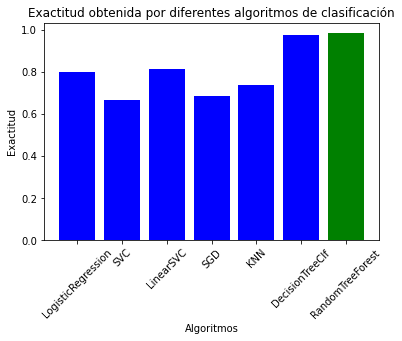

In [22]:
import matplotlib.pyplot as plt

# Encontrar el valor máximo de exactitud
max_accuracy = max(accuracy_scores.values())

plt.bar(range(len(accuracy_scores)), list(accuracy_scores.values()), 
                                            align='center', 
                                            # Color elige que sea verde el valor máximo
                                            color=['green' if v == max_accuracy else 'blue' for v in accuracy_scores.values()])
plt.xticks(rotation=45) # Rotar las etiquetas en un ángulo de 45 grados
plt.xticks(range(len(accuracy_scores)), list(accuracy_scores.keys()))
plt.xlabel('Algoritmos')
plt.ylabel('Exactitud')
plt.title('Exactitud obtenida por diferentes algoritmos de clasificación')
plt.show()

### Boosting

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

dt_heart = pd.read_csv('./datasets/heart.csv')
X = dt_heart.drop(['target'], axis=1)
y = dt_heart['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

#Definimos nuestro clasificador
#n_estimators: cuántos árboles vamos a usar para clasificar nuestro modelo

# Lo que hace Boostin es construir árboles muy pequeños con muy poca profundidad
# y pocas hojas y va intentar entrenarlos uno detrás de otro para lograr un resultado óptimo
# que nos de la clasificación
boost = GradientBoostingClassifier(n_estimators=50).fit(X_train, y_train)
boost_pred = boost.predict(X_test)
print('Accuracy score: ', accuracy_score(boost_pred, y_test)) # calculamos la metrica

Accuracy score:  0.935933147632312


In [29]:
# Para estimar el mejor n_estimators
estimators = range(10, 300, 10)
total_accuracy = []
best_result = {'result' : 0, 'n_estimator': 1}

for i in estimators:
    boost = GradientBoostingClassifier(n_estimators=i).fit(X_train, y_train)
    boost_pred = boost.predict(X_test)
    new_accuracy = accuracy_score(boost_pred, y_test)
    total_accuracy.append(new_accuracy)
    if new_accuracy > best_result['result']: 
        best_result['result'] = new_accuracy
        best_result['n_estimator'] = i

print(best_result)

{'result': 0.9916434540389972, 'n_estimator': 260}


## Estrategias de clustering

Son estrategias de aprendizaje no suprvisado para agrupar los datos de manera que todos los datos pertenecientes a un grupo sean lo mas similares entre sí y los mas lejanos los mas diferentes entre sí.

Dos escenarios de aplicación:

* Cuando sabemos la cantidad de grupos que queremos
* Cuando no sabemos la cantidad de grupos que queremos

### Cuando sabemos la cantidad de "k" con las que agrupar
Supangamos que trabajamos en una tienda de caramelos y queremos organizar todos los caramelos en 4 estantes, donde cada estante tenga caramelos con caracteristicas similares.

In [32]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans #Igual que Kmean pero consume menos recursos

In [34]:
dataset = pd.read_csv('./datasets/candy.csv')
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [35]:
# como es un algoritmo no supervisado no tenemos que partir en train/test
# vamos a usar todos los datos juntos

# Guardamos en una variable todos los datos menos la columna con el nombre del caramelo
X = dataset.drop('competitorname', axis=1)

In [36]:
# Guardamos nuestro modelo en una variable y configuramos
# n_clusters= me dice la cantidad de cluster que yo quiero
# batch_size= definimos la cantiad de datos que van a ir pasando por el algoritmo por cada batch
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8).fit(X)

#Es un valor que devuelve automáticamente el modelo donde nos dice la cantidad de cluster que va a usar
print('Total de centros: ', len(kmeans.cluster_centers_)) 
# Vamos a ver con qué etiqueta va a imprimir cada grupo
# Me devuelve un arreglo con la etiqueta que le dio a cada caramelo en orden como estan en el dataset
print('Etiquetas: ', kmeans.predict(X))

Total de centros:  4
Etiquetas:  [1 1 2 0 3 0 3 2 2 2 2 2 2 0 2 0 2 0 3 2 3 0 3 3 3 3 2 3 1 0 2 3 1 1 0 3 1
 3 1 0 3 3 1 1 2 2 0 1 2 0 2 1 1 1 1 2 1 2 0 2 3 3 2 0 1 3 3 3 1 2 2 2 2 3
 0 0 0 0 0 1 0 2 0 0 0]


In [37]:
#El arreglo de etiquetas así como esta no es muy útil
# Lo que podemos hacer es pegar ese arreglo al conjunto de datos original

#Creamos una nueva columna en el conjunto de datos original
# y le decimos los datos que queremos pegar, en este caso las predicciones
dataset['group'] = kmeans.predict(X)

In [39]:
dataset.head(5)

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,group
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,1
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,1
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,2
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,3


In [44]:
%pip install seaborn

     ------------------------------------ 293.3/293.3 kB 533.0 kB/s eta 0:00:00

[notice] A new release of pip available: 22.2.2 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip



<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

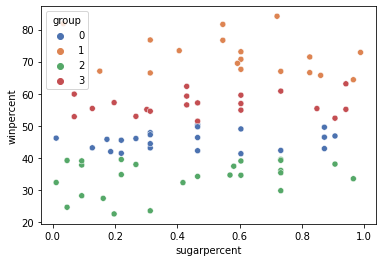

In [45]:
import seaborn as sns
sns.scatterplot(data=dataset, 
                x="sugarpercent", 
                y="winpercent", 
                hue="group",
                palette="deep")

### Cuando queremos que el algoritmo decida la cantidad de "k"

In [47]:
# Meanshift sirve para una cantidad moderada de datos
from sklearn.cluster import MeanShift

In [48]:
dataset = pd.read_csv('./datasets/candy.csv')
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [49]:
X = dataset.drop('competitorname', axis=1)

# Hacemos una variable para guardar el modelo
# Para configurarlo, por defecto él usa una ecuación matemática para el ancho de banda

meanshift = MeanShift().fit(X)
print('Etiquetas: ', meanshift.labels_) #Me muestra el arreglo de etiquetas
print('Mayor valor de etiqueta: ', max(meanshift.labels_))

Etiquetas:  [2 2 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 2 1 2 0 1 2 0 0 1 2 2 0 1 2
 2 2 1 1 1 2 2 0 0 0 2 0 0 0 2 2 2 2 0 2 0 0 0 2 1 0 0 2 2 2 1 2 0 0 0 0 1
 1 0 0 1 1 2 0 0 0 0 1]
Mayor valor de etiqueta:  2


Como las etiquetas empiezan de cero, entonces podemos ver que son 3 grupos

In [50]:
# La ubicación de los centros que puso sobre los datos
print('Ubicación de los centros: ', meanshift.cluster_centers_)

Ubicación de los centros:  [[2.25000000e-01 5.75000000e-01 1.00000000e-01 2.50000000e-02
  5.00000000e-02 2.50000000e-02 3.00000000e-01 1.00000000e-01
  5.50000000e-01 4.57599993e-01 3.67824996e-01 4.10442122e+01]
 [4.68750000e-01 5.00000000e-01 1.25000000e-01 1.56250000e-01
  9.37500000e-02 6.25000000e-02 1.25000000e-01 3.12500000e-01
  5.31250000e-01 4.57281243e-01 4.67874998e-01 5.21138597e+01]
 [8.26086957e-01 1.73913043e-01 3.04347826e-01 3.04347826e-01
  1.73913043e-01 1.73913043e-01 0.00000000e+00 5.21739130e-01
  4.34782609e-01 5.81391293e-01 6.38086963e-01 6.47120799e+01]]


In [52]:
# también podemos integrar los grupos que predijo a nuestro conjunto de datos originales
dataset['meanshift'] = meanshift.labels_
dataset.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,meanshift
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,2
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,2
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,0
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,0
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,1


## Validación de datos por K-Fols

Hay varios métodos de validación:

* **Hold Out**: lo que hacemos normalmente, cuando dividimos los datos en entrenamiento/prueba.
* **K-fold**: cuando plegamos nuestros datos k veces y usamos estas configuraciones cada vez en el entrenamiento, intentando cubrir todos los datos de entrenamiento y testeo al finalizar el proceso.
* **LOOCV**: Leave One Out Cross Validation. Este es un método mas intensivo, donde se hacen particiones entre entrenamiento y pruebas, con todos los datos para el entrenamiento excepto un valor, que se usa para la prueba. Se repite este proceso tantas veces hasta que se usen todos los datos para la prueba.

In [2]:
import pandas as pd
import numpy as np

# Traemos un árbol de decisión para predecir el valor de una variable continua
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import (cross_val_score, KFold)

In [3]:
dataset = pd.read_csv('./datasets/felicidad.csv')
dataset.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [4]:
# Armamos nuestro conjunto de datos sin las columnas del pais y puntaje
# ajustamos al eje de las columnas
X = dataset.drop(['country', 'score'], axis=1)
# La columna que vamos a predecir es score
y = dataset['score']

In [5]:
# Ahora usamos nuestro modelo, y lo dejamos con la configuración por defecto
model = DecisionTreeRegressor()

In [6]:
# Antes en este punto usabamos fit para ajustar a nuestros datos
# Pero ahora, como vamos a usar Cross Validation, y CV se encarga de todo el proceso
# entonces vamos a llamar directamente a la función de cross validation
# esto es recomendable para cuando queremos hacer una prueba rápida con las configuraciones por defecto

score = cross_val_score(model, #mandamos nuestro modelo
                       X, #mandamos los features
                       y, #mandamos los target
                       cv=3,
                       scoring='neg_mean_squared_error',) #opcional: podemos elegir el método con el que vamos a hacer CV
print('Score: ', score)

Score:  [-0.84230062 -0.15857899 -0.72276584]


Nos da un arreglo de todos valores negativos. Son negativos por el scorig elegido.

Cada uno de los valores dentro del arreglo es el error medio cuadrático que obtuvo de cada una de las pruebas.

Por defecto el CV hace 5 pliegues de los datos. Esto se puede configurar con cv= indicando la cantidad de pliegues que quiero.

Para trabajar con estos arreglos que son negativos y son varios valores es que usamos numpy.

In [7]:
print('Promedio de los score de CV: ', np.mean(score))
print('Valor absoluto de ese promedio: ', np.abs(np.mean(score)))

Promedio de los score de CV:  -0.5745484826672641
Valor absoluto de ese promedio:  0.5745484826672641


In [8]:
# Si queremos saber como funciona CV de fondo tenemos que usar la función K-fold
kf = KFold(n_splits=3, #es el número de pliegues que queremos
          shuffle=True, #Si queremos que se organicen en forma aleatoria o en el orden del conjunto de datos
          random_state=42) #para mantener la replicabilidad
#Esto lo pasamos por un for para que por cada partición nos muestre los elementos de train y test
for train, test in kf.split(dataset):
    print('Train: ', train) #Me muestra los elementos que elige para entrenamiento
    print('Test: ', test) #Me muestra los elementos que elige para testeo
    print('='*100)

# Luego aca podemos pasar train y test por el modelo que querramos como hicimos antes.

Train:  [  0   1   2   3   4   5   6   7   8  10  13  14  16  17  20  21  23  25
  28  32  33  34  35  37  38  39  40  41  43  44  46  47  48  49  50  52
  53  54  57  58  59  61  62  63  64  67  70  71  72  73  74  77  80  83
  87  88  89  91  92  94  97  98  99 100 101 102 103 104 105 106 107 108
 110 111 112 113 114 115 116 120 121 123 125 127 128 129 130 132 134 135
 136 139 140 143 144 145 146 148 149 150 151 152 154]
Test:  [  9  11  12  15  18  19  22  24  26  27  29  30  31  36  42  45  51  55
  56  60  65  66  68  69  75  76  78  79  81  82  84  85  86  90  93  95
  96 109 117 118 119 122 124 126 131 133 137 138 141 142 147 153]
Train:  [  1   2   3   6   8   9  11  12  13  14  15  17  18  19  20  21  22  24
  26  27  29  30  31  36  37  38  42  45  48  50  51  52  54  55  56  57
  58  59  60  63  65  66  68  69  71  72  74  75  76  78  79  81  82  83
  84  85  86  87  88  89  90  91  92  93  95  96  99 100 102 103 106 107
 109 112 115 116 117 118 119 120 121 122 124 126 128 1

Cada arreglo contiene los índices de la partición que hizo en cada pliegue.

El primer arrgle es el conjunto de train y el segundo arreglo es el conjunto de test, para cada pliegue.


## Optimización paramétrica con CV
Para lograr automatizar un poco este proceso de ML, es decir, la selección y la optimización del modelo, teniendo en cuenta cómo funciona el proceso de Cros Validation. Una vez que encontramos el modelo que parece funcionar, necesitamos encontrar  la optimización de cada uno de los parámetros para encontrar el que mejor se ajuste y el que mejor resultado nos de.

La optimización paramétrica es una labor bastante tediosa, hay muchos parámetros que se pueden optimizar y es fácil perderse entre los conceptos de tantos parámetros que nos ofrece Scikit-learn. Es dififícil medir la sensibiliad de los mismos si lo hacemos manualmente y aunque lo hicieramos dentro de un ciclo for, esto sería muy costoso computacionalmente.

### RandomizedSearchCV

In [10]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [11]:
dataset = pd.read_csv('./datasets/felicidad.csv')

In [12]:
dataset.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [16]:
X = dataset.drop(['country', 'rank', 'score'], axis=1)
y = dataset['score']

In [81]:
# Definismo el regresor que vamos a usar y lo dejamos sin parámetros
reg = RandomForestRegressor()

In [82]:
# Vamos a definir la grilla de parámetros que va a utilizar 
# nuestro optimizador para que nos busque la mejor combinación de parámetros
# Esta grilla es un diccionario
parametros = {
    'n_estimators' : range(4,16), # Cuántos árboles van a componer mi bosque, entre 4 y 15 (pongo 16 porque es n-1)
    'criterion'    : ['absolute_error', 'squared_error'], #Es una medida de calidad de los split que hace mi árbol. Me dice que tan bueno o malo fue
    'max_depth'    : range(2,10) #Para limitar qué tan profundo queremos nuestros árboles
}

In [83]:
# Vamos a definir nuestro optimizador
rand_est = RandomizedSearchCV(reg, #Le decimos cual es nuestro modelo
                              parametros, #Le decimos cuales son los parámetros de la grilla
                              n_iter=10, #Le limitamos la cantidad de iteraciones o configuraciones de cada uno de los parámtros definidos en parametros
                              cv=3, #Como vamos a usar CV le decimos los pliegues que queremos
                              scoring='neg_mean_squared_error').fit(X, y) #Le decimos con que función queremos medir que tan bien nos fue
                                                                          #Y entrenamos
print('  Mejor combinación de estimadores:')
print(rand_est.best_estimator_)
print('  Mejores parámetros encontrados:')
print(rand_est.best_params_)
print('  Mejor scoring:')
print(np.abs(rand_est.best_score_))

  Mejor combinación de estimadores:
RandomForestRegressor(criterion='absolute_error', max_depth=8, n_estimators=13)
  Mejores parámetros encontrados:
{'n_estimators': 13, 'max_depth': 8, 'criterion': 'absolute_error'}
  Mejor scoring:
0.5874133422674036


In [84]:
# Hacemos una predicción muy simple
# Cuando le pedimos una predicción, automáticamente va a tomar el best_estimator_ para hacerla
print(rand_est.predict(X.loc[[0]])) #Queremos ver que predice para la primer fila, es decir, el score para el primer país

[7.5273078]


In [85]:
# Vemos que la etiqueta real era de 7.537
dataset.loc[[0]]

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027


### GridSearchCV

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
#Defino de los modelos a usar
reg = RandomForestRegressor()

In [88]:
# Defino los parámetos que quiero iterar
params = {'n_estimators' : range(4,16),
          'criterion'    : ['absolute_error', 'squared_error'],
          'max_depth'    : range(2,10)}

In [89]:
grid_reg = GridSearchCV(reg,
                        params,
                        cv=3,
                        scoring='neg_mean_squared_error').fit(X, y)

In [90]:
print('  Mejor combinación de estimadores:')
print(grid_reg.best_estimator_)
print('  Mejores parámetros encontrados:')
print(grid_reg.best_params_)
print('  Mejor scoring:')
print(np.abs(grid_reg.best_score_))

  Mejor combinación de estimadores:
RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=4)
  Mejores parámetros encontrados:
{'criterion': 'absolute_error', 'max_depth': 5, 'n_estimators': 4}
  Mejor scoring:
0.568968139874565
